In [1]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go

from scipy.stats import zscore

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import recall_score, roc_auc_score, log_loss

from yellowbrick.classifier import ClassificationReport, ROCAUC

import random

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

/Users/silver-moon/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



In [2]:
# Adjust display and formatting settings
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [30, 15]
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 500)           
pd.set_option('display.max_rows', 500) 

In [3]:
df = pd.read_csv('vehicle.csv')
df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95        48.00                 83.00        178.00   
1           91        41.00                 84.00        141.00   
2          104        50.00                106.00        209.00   
3           93        41.00                 82.00        159.00   
4           85        44.00                 70.00        205.00   
5          107          nan                106.00        172.00   
6           97        43.00                 73.00        173.00   
7           90        43.00                 66.00        157.00   
8           86        34.00                 62.00        140.00   
9           93        44.00                 98.00           nan   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                 72.00                       10         162.00   
1                 57.00                        9         149.00   
2                 66.00                       10         207.00   
3                 63.00                        9         144.00   
4                103.00                       52         149.00   
5                 50.00                        6         255.00   
6                 65.00                        6         153.00   
7                 65.00                        9         137.00   
8                 61.00                        7         122.00   
9                 62.00                       11         183.00   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0          42.00                   20.00                        159   
1          45.00                   19.00                        143   
2          32.00                   23.00                        158   
3          46.00                   19.00                        143   
4          45.00                   19.00                        144   
5          26.00                   28.00                        169   
6          42.00                   19.00                        143   
7          48.00                   18.00                        146   
8          54.00                   17.00                        127   
9          36.00                   22.00                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0           176.00             379.00                     184.00   
1           170.00             330.00                     158.00   
2           223.00             635.00                     220.00   
3           160.00             309.00                     127.00   
4           241.00             325.00                     188.00   
5           280.00             957.00                     264.00   
6           176.00             361.00                     172.00   
7           162.00             281.00                     164.00   
8           141.00             223.00                     112.00   
9           202.00             505.00                     152.00   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                        70.00            6.00             16.00   
1                        72.00            9.00             14.00   
2                        73.00           14.00              9.00   
3                        63.00            6.00             10.00   
4                       127.00            9.00             11.00   
5                        85.00            5.00              9.00   
6                        66.00           13.00              1.00   
7                        67.00            3.00              3.00   
8                        64.00            2.00             14.00   
9                        64.00            4.00             14.00   

   skewness_about.2  hollows_ratio class  
0            187.00            197   van  
1            189.00            199   van  
2            188.00            196   car  
3            199.00            207   van  
4            180.00            1

In [4]:
df.shape

(846, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [6]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
dtype: int64

In [7]:
df['skewness_about'].fillna((df['skewness_about'].median()), inplace=True)
df['distance_circularity'].fillna((df['distance_circularity'].median()), inplace=True)
df['radius_ratio'].fillna((df['radius_ratio'].median()), inplace=True)
df['pr.axis_aspect_ratio'].fillna((df['pr.axis_aspect_ratio'].median()), inplace=True)
df['scatter_ratio'].fillna((df['scatter_ratio'].median()), inplace=True)
df['elongatedness'].fillna((df['elongatedness'].median()), inplace=True)
df['pr.axis_rectangularity'].fillna((df['pr.axis_rectangularity'].median()), inplace=True)
df['scaled_variance'].fillna((df['scaled_variance'].median()), inplace=True)
df['scaled_variance.1'].fillna((df['scaled_variance.1'].median()), inplace=True)
df['scaled_radius_of_gyration'].fillna((df['scaled_radius_of_gyration'].median()), inplace=True)
df['scaled_radius_of_gyration.1'].fillna((df['scaled_radius_of_gyration.1'].median()), inplace=True)
df['skewness_about.1'].fillna((df['skewness_about.1'].median()), inplace=True)
df['skewness_about.2'].fillna((df['skewness_about.2'].median()), inplace=True)

In [8]:
df.isna().any()[lambda x: x]

circularity    True
dtype: bool

In [9]:
df.describe().T

count   mean    std    min    25%    50%    75%  \
compactness                 846.00  93.68   8.23  73.00  87.00  93.00 100.00   
circularity                 841.00  44.83   6.15  33.00  40.00  44.00  49.00   
distance_circularity        846.00  82.10  15.74  40.00  70.00  80.00  98.00   
radius_ratio                846.00 168.87  33.40 104.00 141.00 167.00 195.00   
pr.axis_aspect_ratio        846.00  61.68   7.88  47.00  57.00  61.00  65.00   
max.length_aspect_ratio     846.00   8.57   4.60   2.00   7.00   8.00  10.00   
scatter_ratio               846.00 168.89  33.20 112.00 147.00 157.00 198.00   
elongatedness               846.00  40.94   7.81  26.00  33.00  43.00  46.00   
pr.axis_rectangularity      846.00  20.58   2.59  17.00  19.00  20.00  23.00   
max.length_rectangularity   846.00 148.00  14.52 118.00 137.00 146.00 159.00   
scaled_variance             846.00 188.60  31.36 130.00 167.00 179.00 217.00   
scaled_variance.1           846.00 439.31 176.50 184.00 318.25 363.50 586.75   
scaled_radius_of_gyration   846.00 174.71  32.55 109.00 149.00 173.50 198.00   
scaled_radius_of_gyration.1 846.00  72.44   7.47  59.00  67.00  71.50  75.00   
skewness_about              846.00   6.36   4.90   0.00   2.00   6.00   9.00   
skewness_about.1            846.00  12.60   8.93   0.00   5.00  11.00  19.00   
skewness_about.2            846.00 188.92   6.15 176.00 184.00 188.00 193.00   
hollows_ratio               846.00 195.63   7.44 181.00 190.25 197.00 201.00   

                                 max  
compactness                   119.00  
circularity                    59.00  
distance_circularity          112.00  
radius_ratio                  333.00  
pr.axis_aspect_ratio          138.00  
max.length_aspect_ratio        55.00  
scatter_ratio                 265.00  
elongatedness                  61.00  
pr.axis_rectangularity         29.00  
max.length_rectangularity     188.00  
scaled_variance               320.00  
scaled_variance.1           1,018.00  
scaled_radius_of_gyration     268.00  
scaled_radius_of_gyration.1   135.00  
skewness_about                 22.00  
skewness_about.1               41.00  
skewness_about.2              206.00  
hollows_ratio                 211.00

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

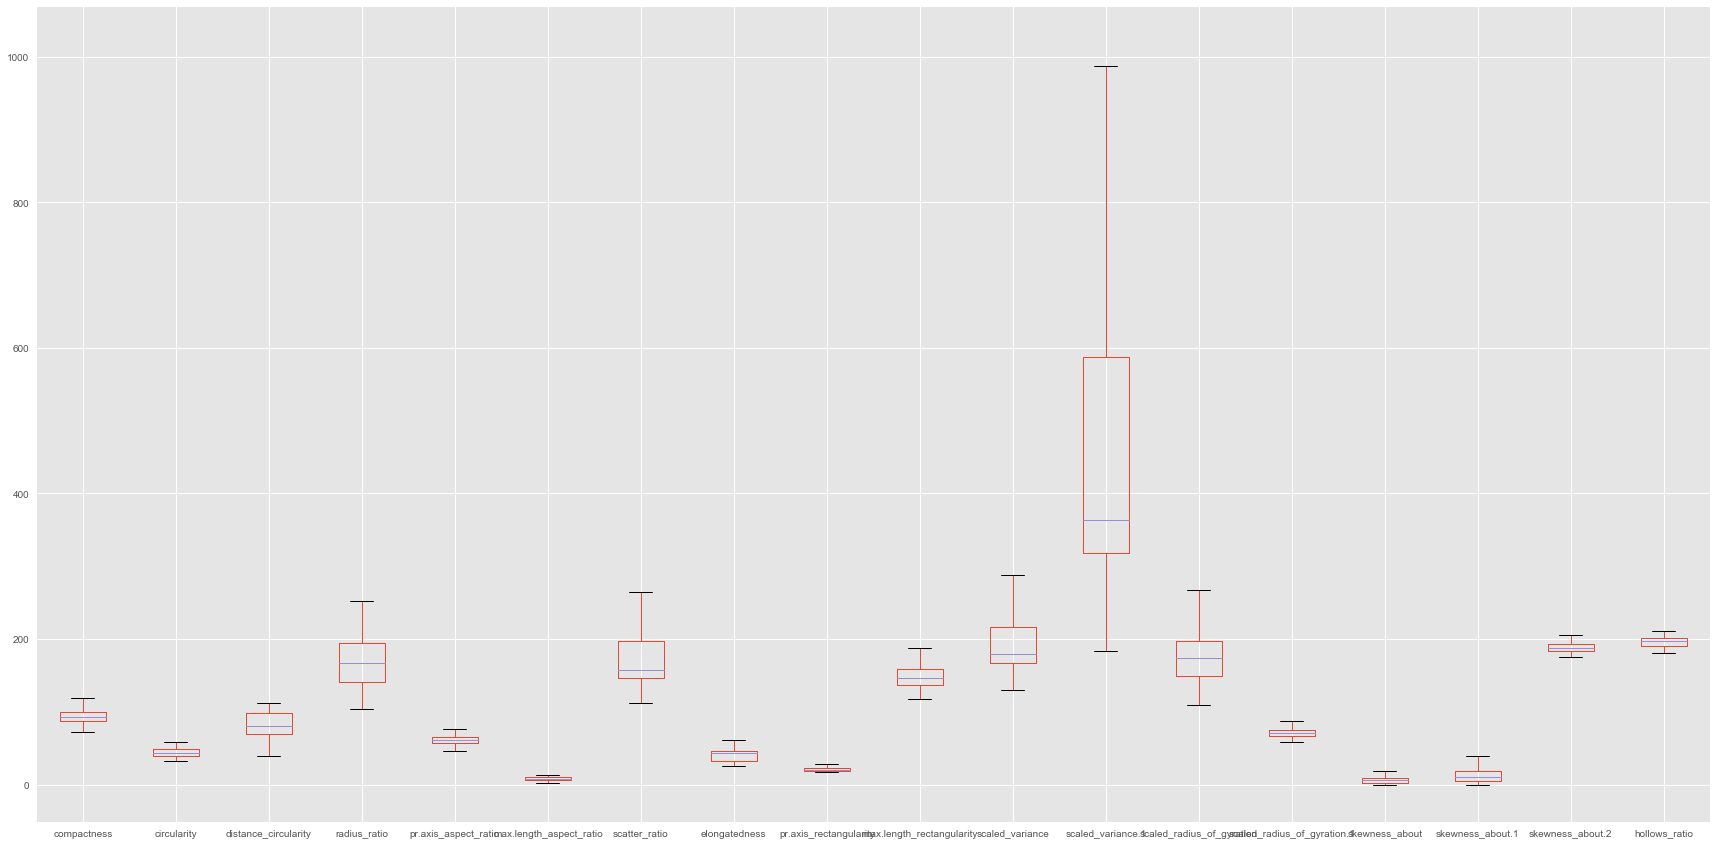

In [11]:
df.boxplot()

In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

compactness                    13.00
circularity                     9.00
distance_circularity           28.00
radius_ratio                   54.00
pr.axis_aspect_ratio            8.00
max.length_aspect_ratio         3.00
scatter_ratio                  51.00
elongatedness                  13.00
pr.axis_rectangularity          4.00
max.length_rectangularity      22.00
scaled_variance                50.00
scaled_variance.1             268.50
scaled_radius_of_gyration      49.00
scaled_radius_of_gyration.1     8.00
skewness_about                  7.00
skewness_about.1               14.00
skewness_about.2                9.00
hollows_ratio                  10.75
dtype: float64


In [13]:
df_new = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_new.shape

(813, 19)

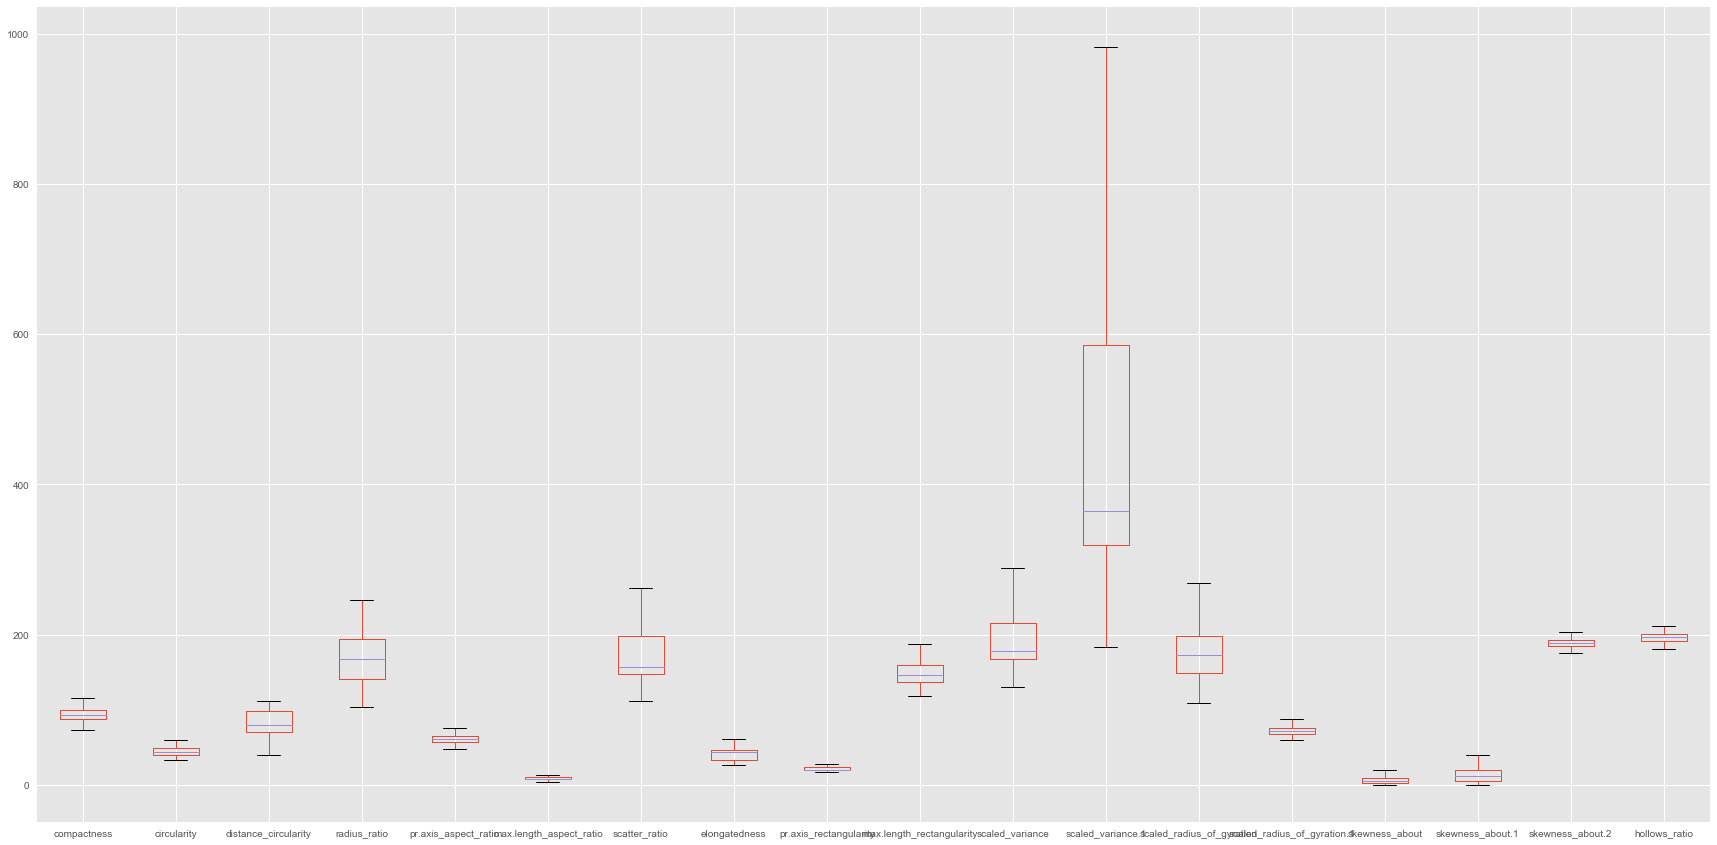

In [14]:
df_new.boxplot()

/Users/silver-moon/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:444: RuntimeWarning:

invalid value encountered in greater

/Users/silver-moon/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:444: RuntimeWarning:

invalid value encountered in less



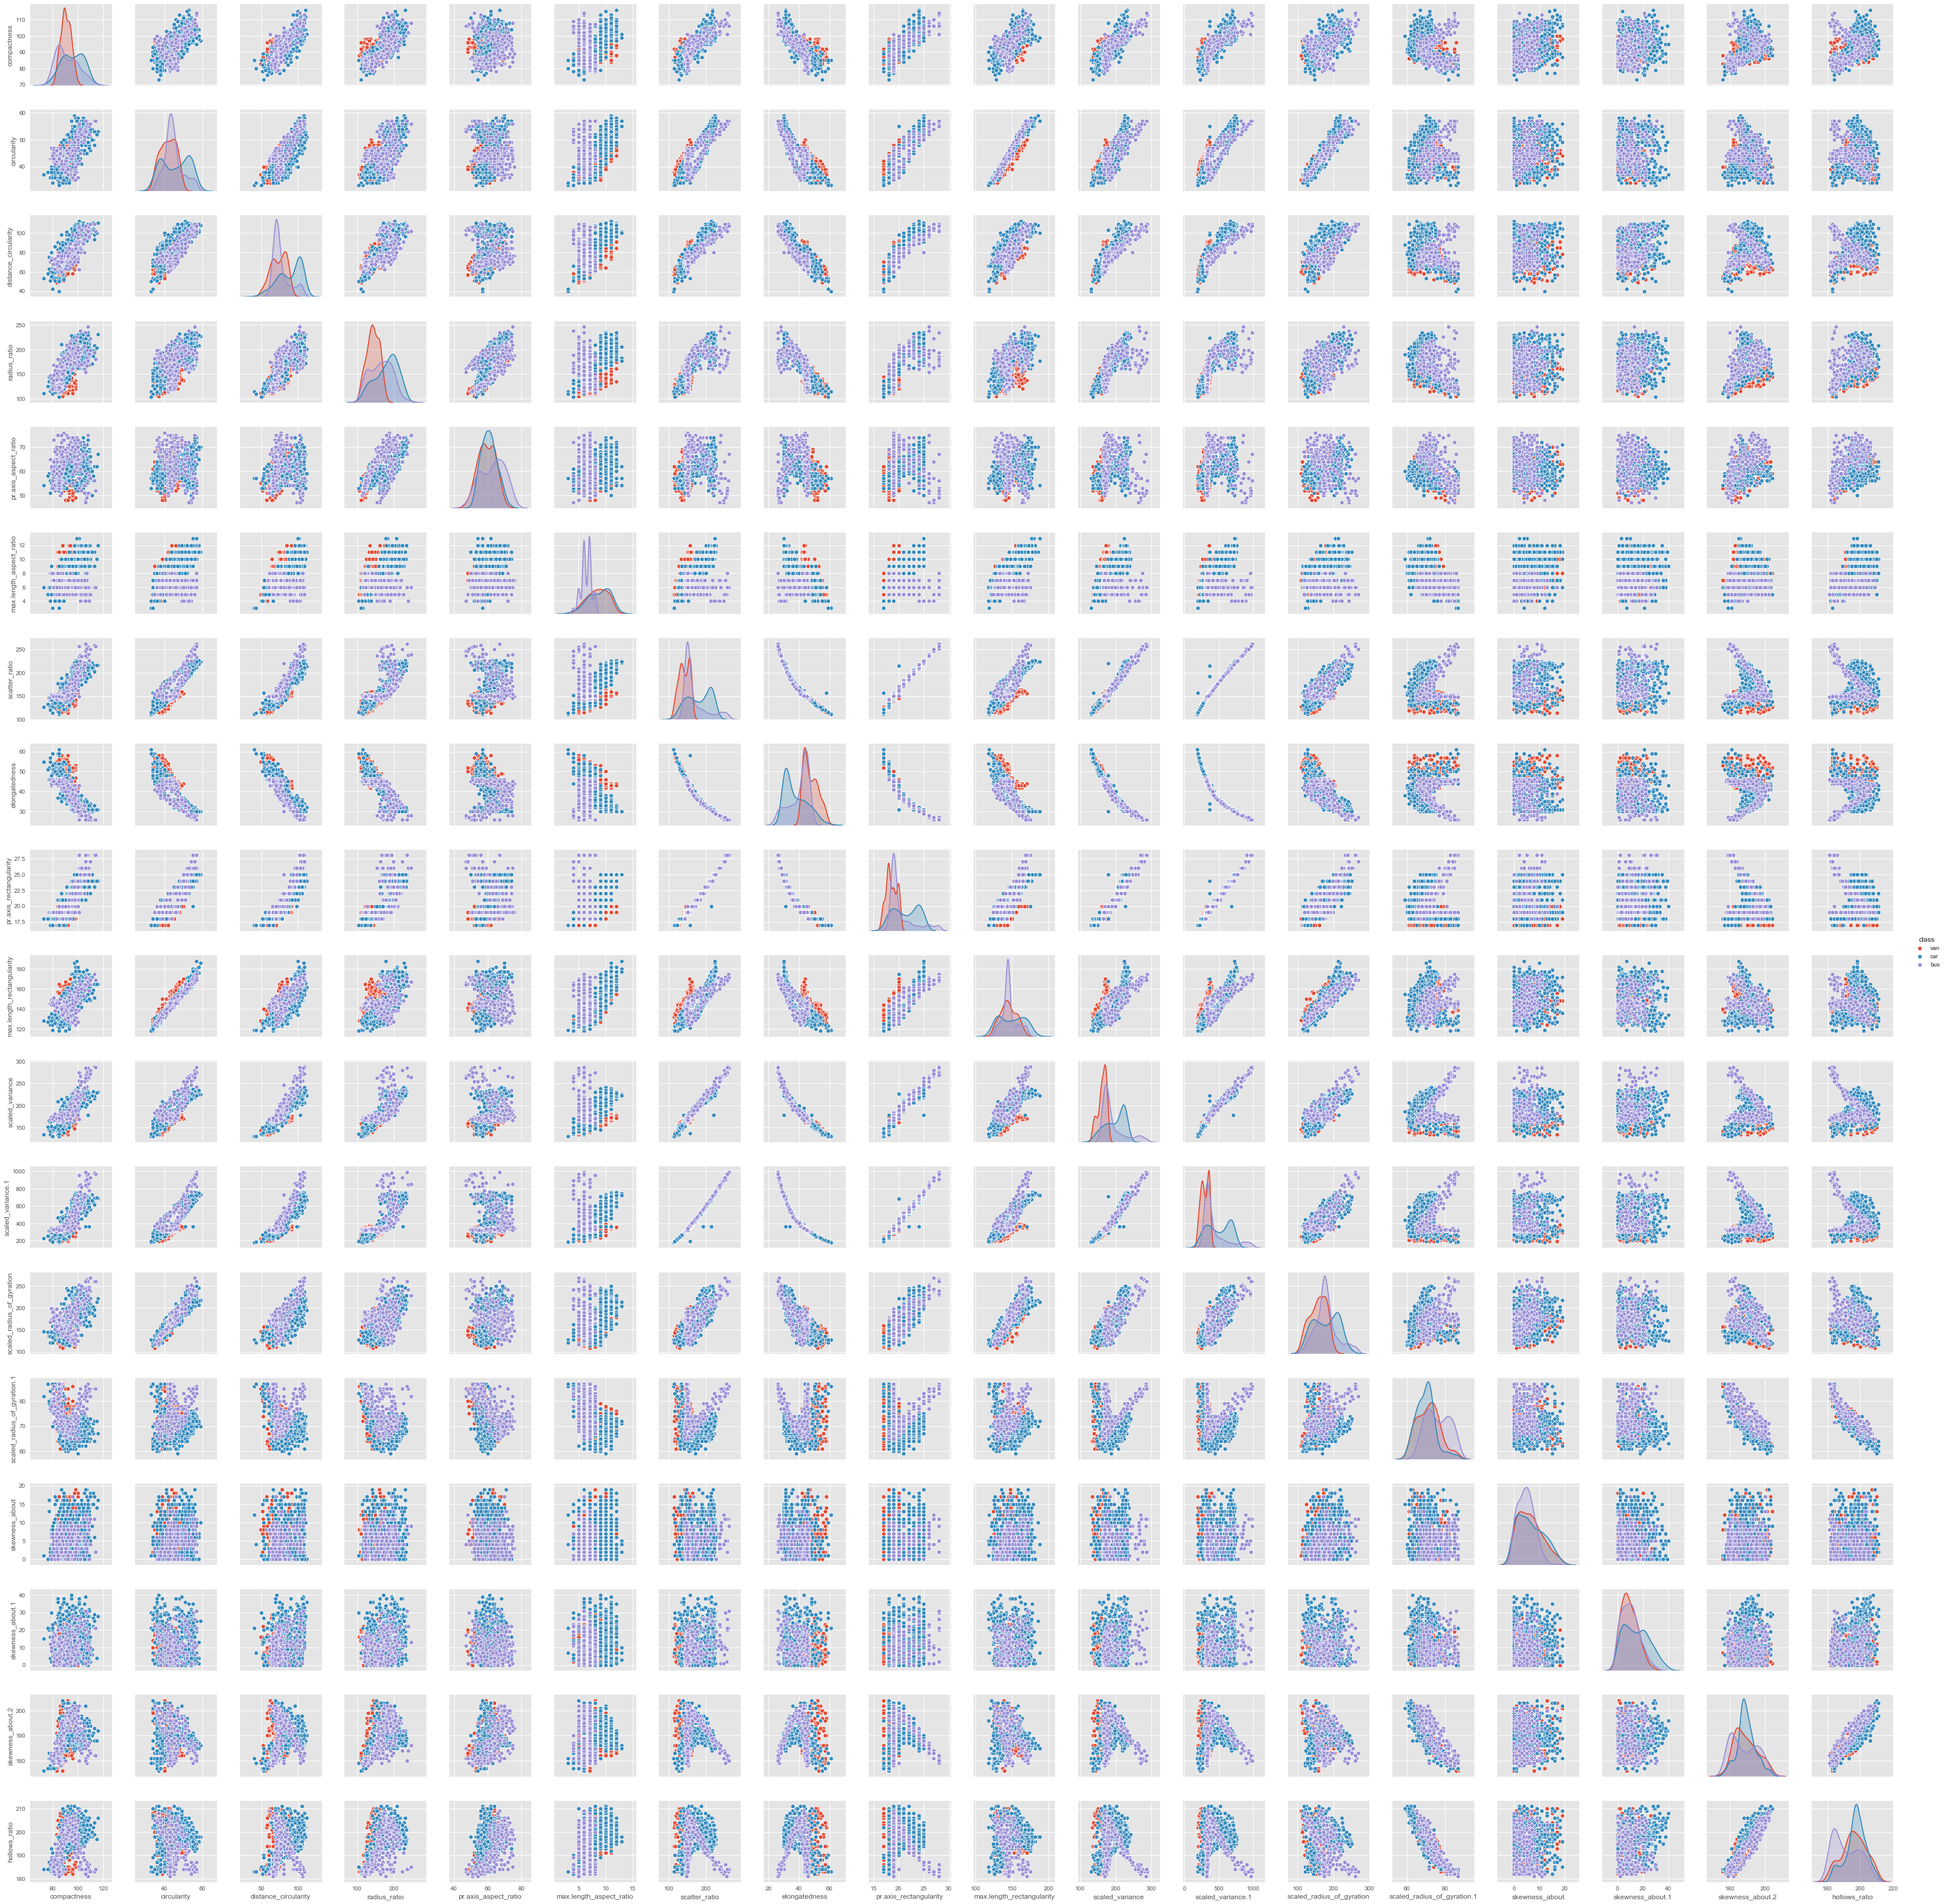

In [15]:
sns.pairplot(df_new, diag_kind='kde', hue ='class')

In [16]:
df_corr = df_new.corr()

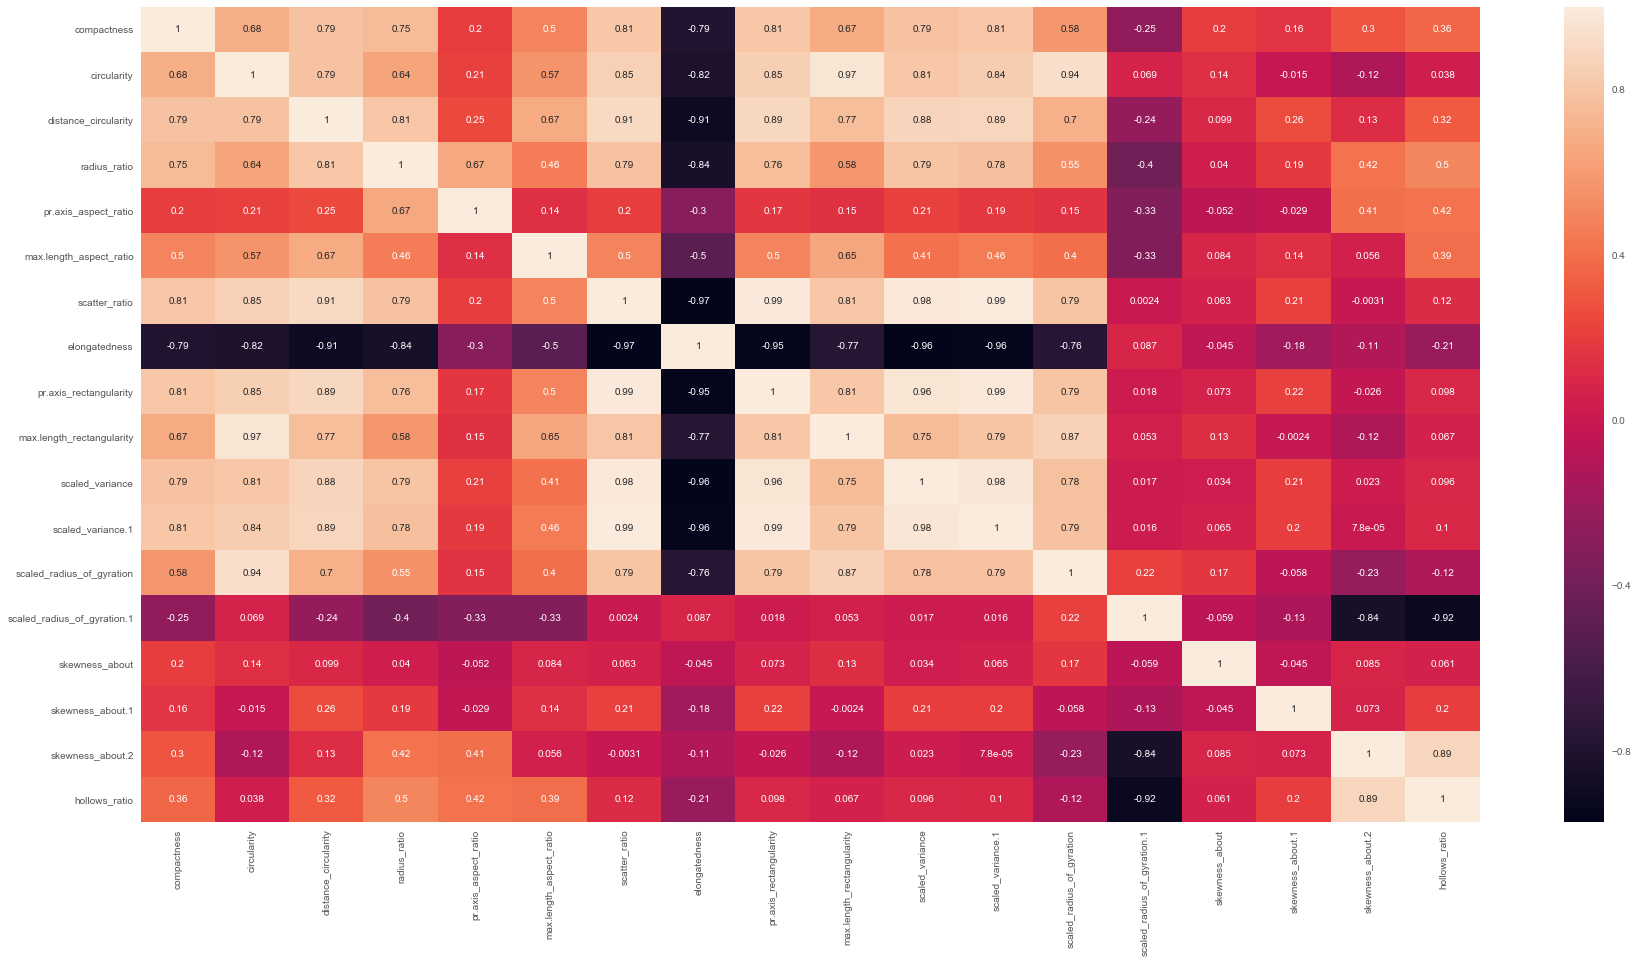

In [17]:
sns.heatmap(df_corr, annot = True)

# From the above heatmap it is clear that Elongatedess has a strong negative co-relation with compactness, circularity, distance circularity, radius ratio, scatter ratio, pr_axis_rectangularity, max.length_rectangularity, scaled_variance and scaled_variance.1, so all these columns can be and be dropped and represented by the elongetedness column
# Also, scaled_radius_of_gyration_1 is negatively co-related with skewness_about.2 and hollows_ratio, so they can be successfully dropped

In [18]:
df_new_mod = df_new.drop(columns = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio', 'scatter_ratio', 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance', 'scaled_variance.1', 'skewness_about.2', 'hollows_ratio'])

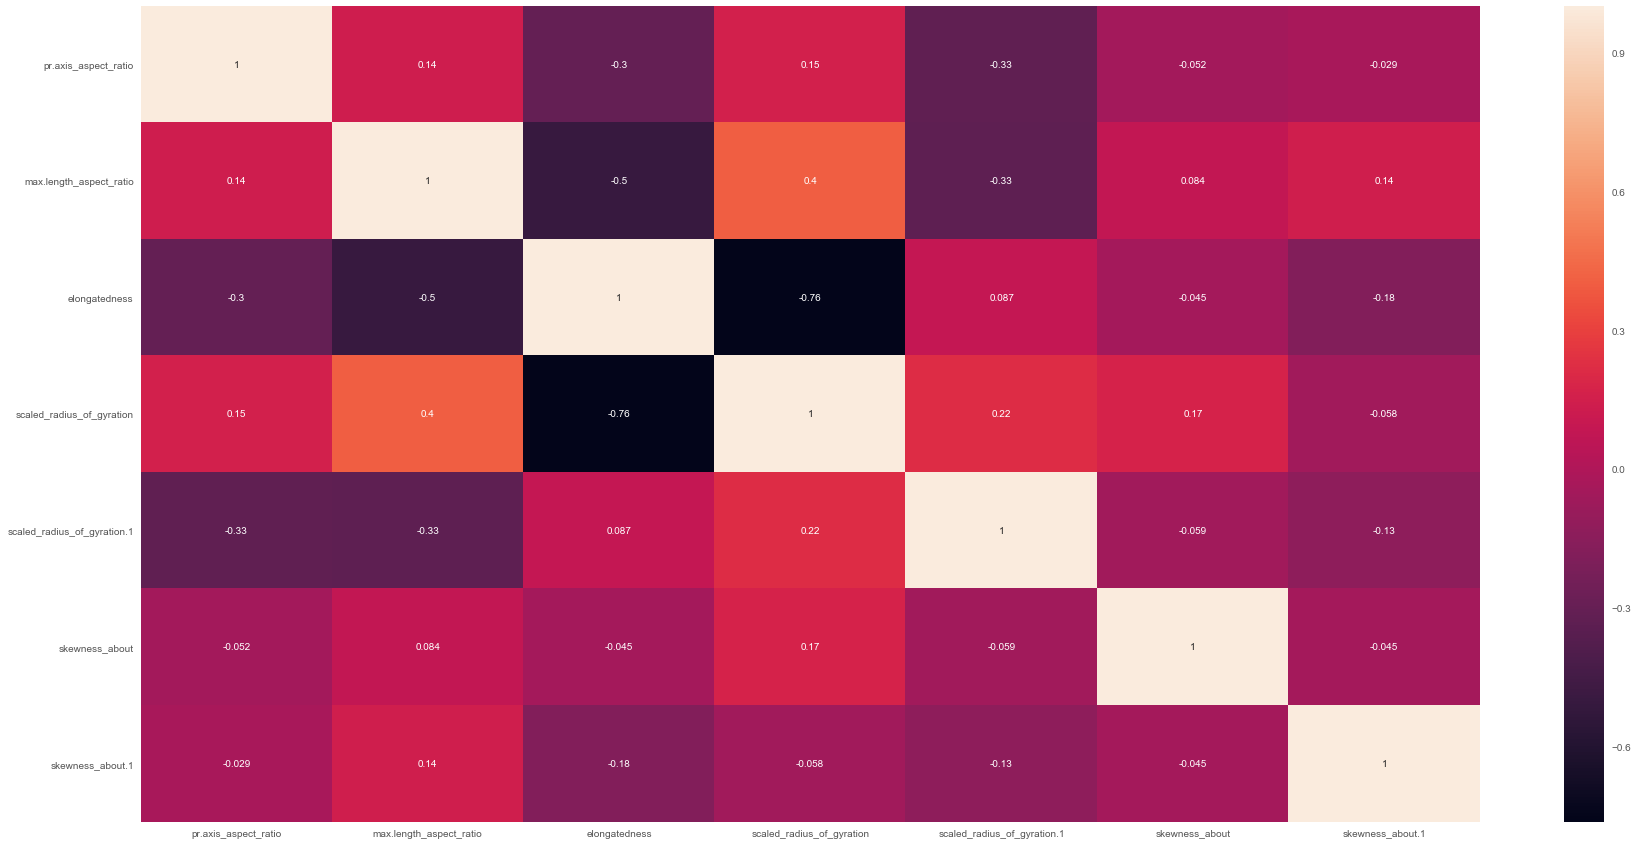

In [19]:
sns.heatmap(df_new_mod.corr(), annot = True)

In [20]:
# Separate predictors and target
X = df_new_mod.drop(columns = 'class')
y = df_new_mod['class']

In [21]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [22]:
# scaling the data using zscores
X_train_z = X_train.apply(zscore)
X_test_z = X_test.apply(zscore)

In [23]:
# The goal of PCA is to reduce number of dimensions while maximizing the variance (useful information) in the new features/principal components
pca = PCA(n_components = 7)
pca.fit(X_train_z)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [24]:
# Plot explained variability

trace1 = dict(
    type = 'bar',
    x = ['PC %s' %i for i in range(1,8)],
    y = np.round(pca.explained_variance_ratio_,2)*100,
    name = 'Individual'
)

trace2 = dict(
    type = 'scatter',
    x = ['PC %s' %i for i in range(1,8)], 
    y = np.round(np.cumsum(pca.explained_variance_ratio_),2)*100,
    name = 'Cumulative'
)

data = [trace1, trace2]

layout = dict(
    title = 'Explained variance by different principal components',
    yaxis = dict(title = 'Explained variance in percent'),
    
    annotations = list([
        dict(
            x = 1.23,
            y = 1.05,
            xref = 'paper',
            yref = 'paper',
            text = 'Explained Variance',
            showarrow = False,
        )
    ])
)

fig = go.Figure(dict(data = data, layout = layout))

fig.update_layout(
    width = 1200,
    height = 600)


fig.show()

# 98% Variance can be explained by 6 Parameters (PC6)

In [25]:
# Create new dataframes with PCA features
X_train_pca = pd.DataFrame(data = pca.transform(X_train_z), columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7'])
X_test_pca = pd.DataFrame(data = pca.transform(X_test_z), columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6', 'PC7'])

In [26]:
# Concatenate dataframes with the original and PCA features for creating correlations
df_combined = pd.concat([X_train_z, X_train_pca], axis = 1)

In [27]:
df_combined.corr()

pr.axis_aspect_ratio  max.length_aspect_ratio  \
pr.axis_aspect_ratio                         1.00                     0.16   
max.length_aspect_ratio                      0.16                     1.00   
elongatedness                               -0.34                    -0.53   
scaled_radius_of_gyration                    0.18                     0.43   
scaled_radius_of_gyration.1                 -0.30                    -0.34   
skewness_about                              -0.08                     0.08   
skewness_about.1                            -0.02                     0.17   
PC1                                          0.09                    -0.06   
PC2                                          0.06                    -0.00   
PC3                                          0.03                     0.07   
PC4                                         -0.06                    -0.03   
PC5                                          0.10                     0.03   
PC6                                         -0.03                    -0.04   
PC7                                         -0.09                    -0.05   

                             elongatedness  scaled_radius_of_gyration  \
pr.axis_aspect_ratio                 -0.34                       0.18   
max.length_aspect_ratio              -0.53                       0.43   
elongatedness                         1.00                      -0.77   
scaled_radius_of_gyration            -0.77                       1.00   
scaled_radius_of_gyration.1           0.10                       0.20   
skewness_about                       -0.02                       0.17   
skewness_about.1                     -0.21                      -0.01   
PC1                                  -0.03                       0.01   
PC2                                  -0.04                       0.11   
PC3                                  -0.02                       0.03   
PC4                                   0.06                      -0.04   
PC5                                  -0.00                      -0.04   
PC6                                   0.07                      -0.10   
PC7                                   0.00                       0.00   

                             scaled_radius_of_gyration.1  skewness_about  \
pr.axis_aspect_ratio                               -0.30           -0.08   
max.length_aspect_ratio                            -0.34            0.08   
elongatedness                                       0.10           -0.02   
scaled_radius_of_gyration                           0.20            0.17   
scaled_radius_of_gyration.1                         1.00           -0.03   
skewness_about                                     -0.03            1.00   
skewness_about.1                                   -0.10           -0.07   
PC1                                                 0.01           -0.04   
PC2                                                 0.10           -0.06   
PC3                                                -0.01            0.06   
PC4                                                 0.10            0.11   
PC5                                                -0.10            0.03   
PC6                                                -0.08           -0.03   
PC7                                                 0.04           -0.03   

                             skewness_about.1   PC1   PC2   PC3   PC4   PC5  \
pr.axis_aspect_ratio                    -0.02  0.09  0.06  0.03 -0.06  0.10   
max.length_aspect_ratio                  0.17 -0.06 -0.00  0.07 -0.03  0.03   
elongatedness                           -0.21 -0.03 -0.04 -0.02  0.06 -0.00   
scaled_radius_of_gyration               -0.01  0.01  0.11  0.03 -0.04 -0.04   
scaled_radius_of_gyration.1             -0.10  0.01  0.10 -0.01  0.10 -0.10   
skewness_about                          -0.07 -0.04 -0.06  0.06  0.11  0.03   
skewness_about.1                         1.00  0.04  0.01  0.03  0.0

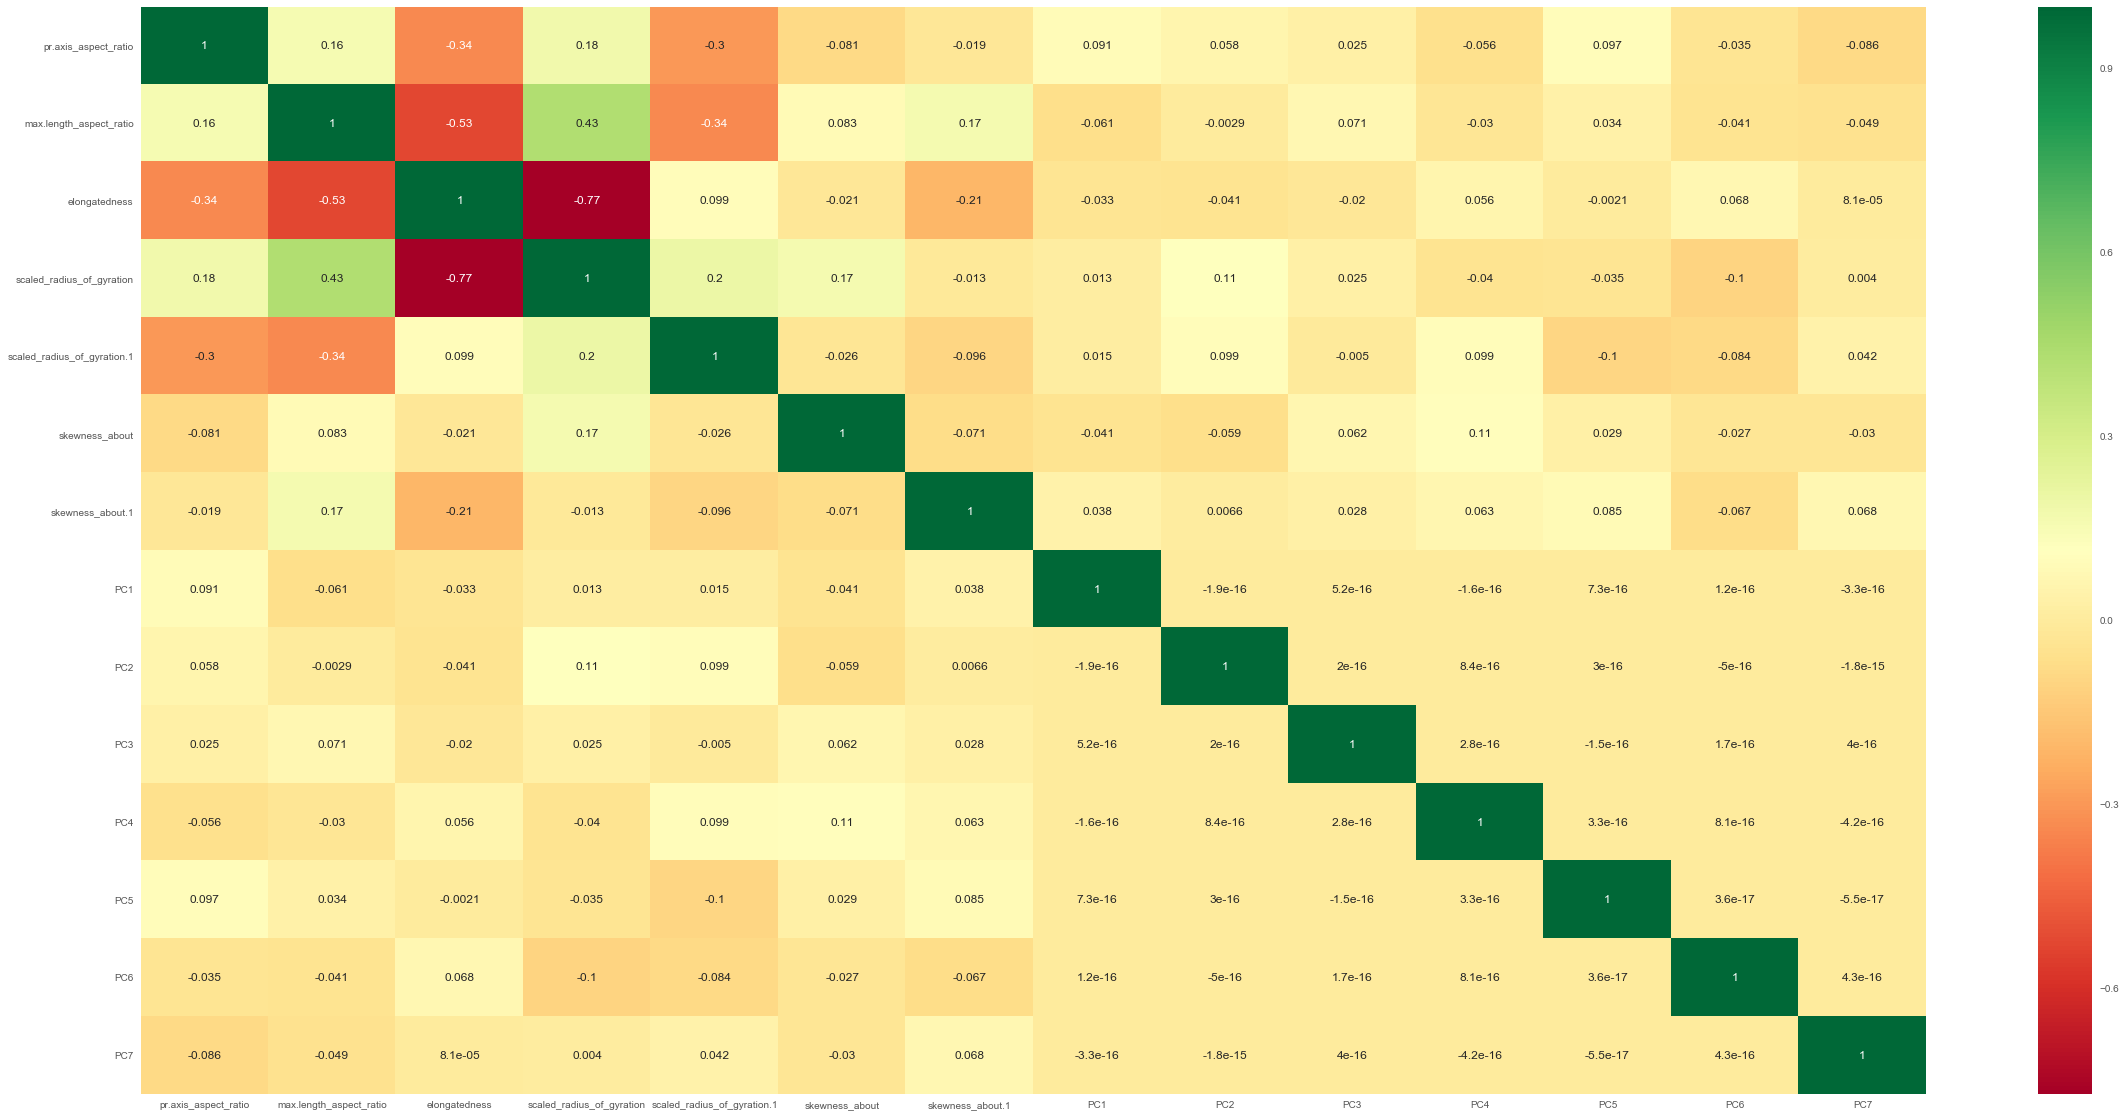

In [28]:
# Correlation matrix of original features and PCA features
plt.figure(figsize=(40, 20))
sns.heatmap(df_combined.corr(),
            annot = True,
            cmap = 'RdYlGn',
            annot_kws={'size':12})

In [29]:
features = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6']

# Support vector classifier
clf = SVC()
clf.fit(X_train_z, y_train)
print ('Before PCA score', clf.score(X_test_z, y_test))

clf.fit(X_train_pca[features], y_train)
print ('After PCA score', clf.score(X_test_pca[features], y_test))

Before PCA score 0.9467213114754098
After PCA score 0.9344262295081968


In [30]:
# Logistic Regression
clf = LogisticRegression()
clf.fit(X_train_z, y_train)
print ('Before PCA score', clf.score(X_test_z, y_test))

clf.fit(X_train_pca[features], y_train)
print ('After PCA score', clf.score(X_test_pca[features], y_test))

Before PCA score 0.8073770491803278
After PCA score 0.7827868852459017


In [32]:
# GaussianNB
clf = GaussianNB()
clf.fit(X_train_z, y_train)
print ('Before PCA score', clf.score(X_test_z, y_test))

clf.fit(X_train_pca[features], y_train)
print ('After PCA score', clf.score(X_test_pca[features], y_test))

Before PCA score 0.7418032786885246
After PCA score 0.7786885245901639


In [33]:
# build a classifier
clf = SGDClassifier(loss='hinge', penalty='elasticnet',
                    fit_intercept=True)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {'average': [True, False],
              'l1_ratio': stats.uniform(0, 1),
              'alpha': loguniform(1e-4, 1e0)}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X_train_pca, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {'average': [True, False],
              'l1_ratio': np.linspace(0, 1, num=10),
              'alpha': np.power(10, np.arange(-4, 1, dtype=float))}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X_train_pca, y_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

RandomizedSearchCV took 0.53 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.852 (std: 0.040)
Parameters: {'alpha': 0.005385934414739374, 'average': False, 'l1_ratio': 0.6406449532001296}

Model with rank: 2
Mean validation score: 0.847 (std: 0.036)
Parameters: {'alpha': 0.006581918015385829, 'average': False, 'l1_ratio': 0.531368935308636}

Model with rank: 3
Mean validation score: 0.847 (std: 0.040)
Parameters: {'alpha': 0.002234404697427117, 'average': False, 'l1_ratio': 0.09464865617523832}

GridSearchCV took 2.54 seconds for 100 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.854 (std: 0.049)
Parameters: {'alpha': 0.01, 'average': False, 'l1_ratio': 0.8888888888888888}

Model with rank: 2
Mean validation score: 0.852 (std: 0.039)
Parameters: {'alpha': 0.01, 'average': False, 'l1_ratio': 0.1111111111111111}

Model with rank: 3
Mean validation score: 0.851 (std: 0.043)
Parameters: {'alpha': 0.01, 'average': False, '